In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
from matplotlib import style

In [2]:
df = pd.read_csv('AEP_hourly.csv')

In [3]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [4]:
df.min()

Datetime    2004-10-01 01:00:00
AEP_MW                   9581.0
dtype: object

In [5]:
df.max()

Datetime    2018-08-03 00:00:00
AEP_MW                  25695.0
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [7]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [8]:
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

# FEATURE EXTRACTION

In [9]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
# dataset['Quarter'] = pd.to_datetime(df['Datetime'].dt.quarter()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head()

C:\Users\bobby\AppData\Local\Temp/ipykernel_8040/799038395.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [10]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Years", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Years 15 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

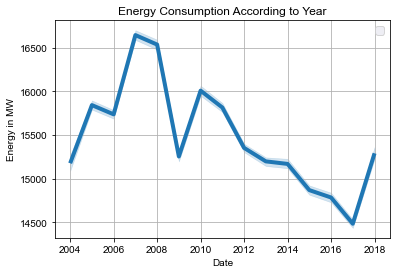

In [11]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('fivethirtyeight')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})


plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()


plt.title("Energy Consumption According to Year")

NameError: name 'x_2004' is not defined

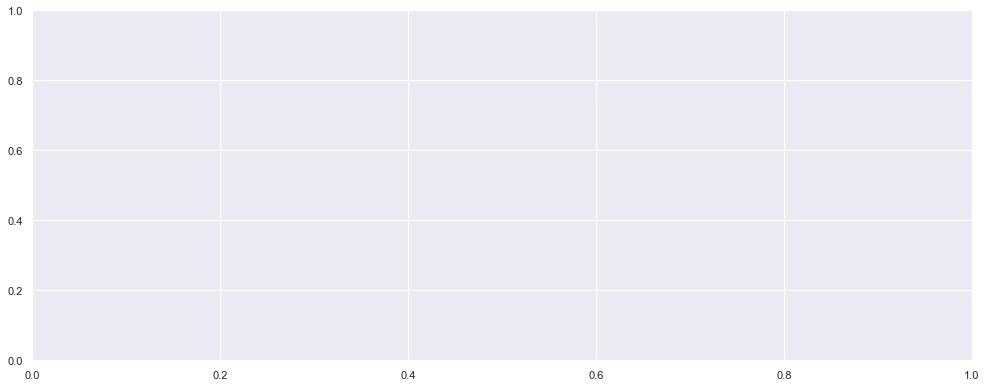

In [12]:
fig = plt.figure()

ax1= fig.add_subplot(111)
style.use('ggplot')

y_2018 = dataset.loc['2018']['AEP_MW'].to_list()
x_2018 = dataset.loc['2018']['Date'].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1)


In [13]:
ax2= fig.add_subplot(311)
y_2017 = dataset.loc["2017"]["AEP_MW"].to_list()
x_2017 = dataset.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color="green", linewidth=1)

C:\Users\bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

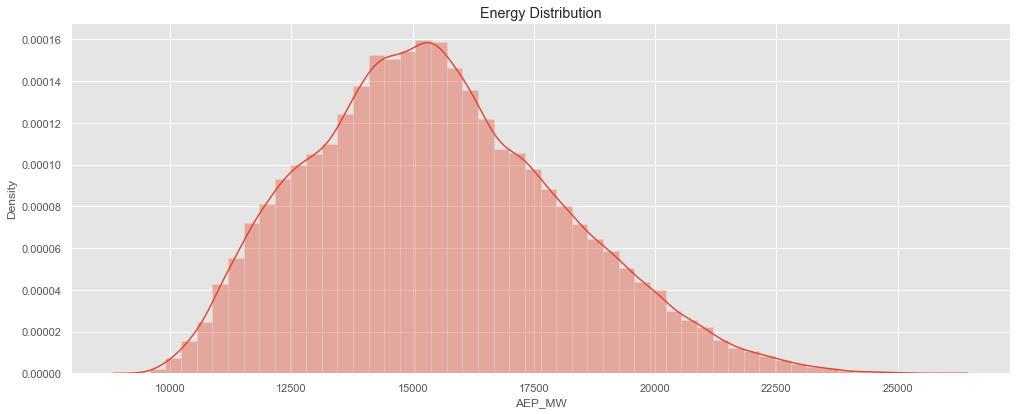

In [14]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

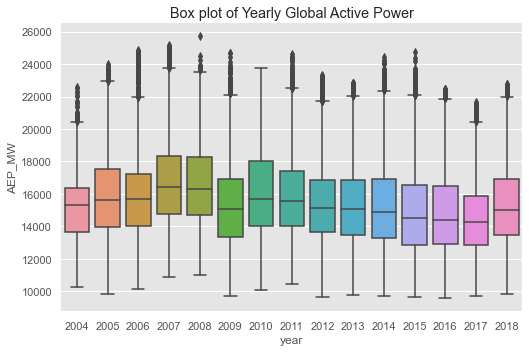

In [15]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="Year", y="AEP_MW", data=df)
plt.xlabel('year')
plt.title('Box plot of Yearly Global Active Power')
sns.despine(left=True)
plt.tight_layout() 

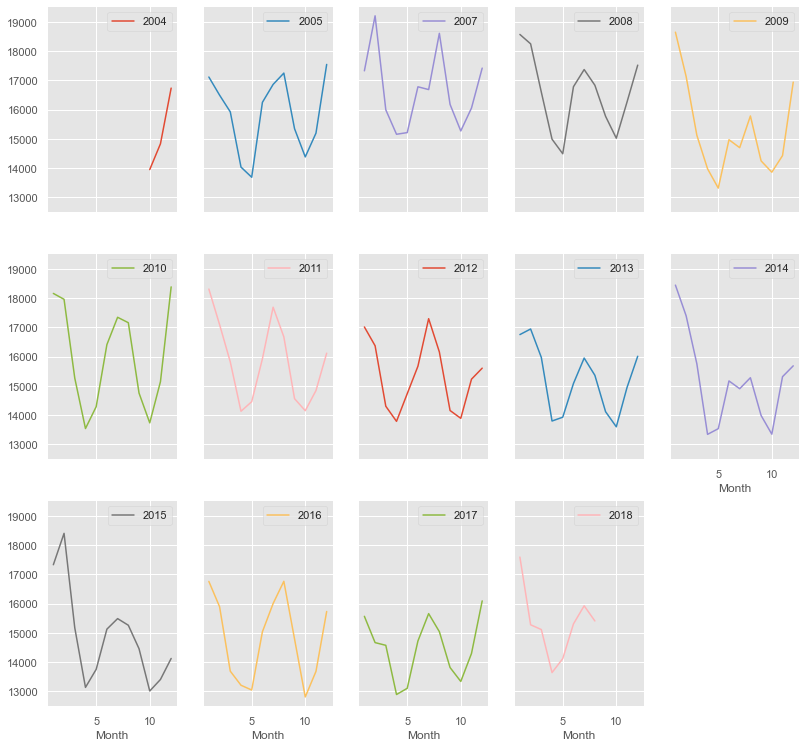

In [16]:
pd.pivot_table(df.loc[df['Year'] != 2006], values = "AEP_MW", 
               columns = "Year", index = "Month").plot(subplots = True, figsize=(12, 12), layout=(3, 5), sharey=True);

# RESAMPLING OF DATA FOR PREDICTION

In [17]:
NewDataSet = dataset.resample('D').mean()
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [18]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-100] #removing a last 100 datapoints from the dataset as they will be used for training

In [19]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4955, 1)
Test Set Shape  (100, 4)


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [22]:
X_Train = []
Y_Train = []

# Range should be fromm 100 Values to END 
for i in range(100, Train.shape[0]):
    
    # X_Train 0-99 
    X_Train.append(Train[i-100:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4855, 100, 1)
(4855, 1)


In [23]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4855, 100, 1)

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

In [25]:
regressor = tf.keras.Sequential()
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense


In [26]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

In [29]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4,2018,17
2018-04-27,12964.000000,4,2018,17


In [30]:
TestData.shape

(100, 4)

In [31]:
NewDataSet.shape


(5055, 4)

In [32]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [33]:
Df_Total.shape

(5155, 1)

In [34]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 100:].values
inputs.shape

(200, 1)

In [35]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 100:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(100, 200):
    X_test.append(inputs[i-100:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_ = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_ = sc.inverse_transform(predicted_)

4/4 [==============================] - 4s 110ms/step


In [36]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_
dates = TestData.index.to_list()

In [37]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [38]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,11199.801758
1,2018-04-27,12964.000000,11198.003906
2,2018-04-28,12237.583333,11195.700195
3,2018-04-29,12156.791667,11192.503906
4,2018-04-30,13443.500000,11188.209961
...,...,...,...
95,2018-07-30,15368.083333,11210.253906
96,2018-07-31,15180.291667,11207.994141
97,2018-08-01,15151.166667,11205.688477
98,2018-08-02,15687.666667,11203.452148


In [39]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


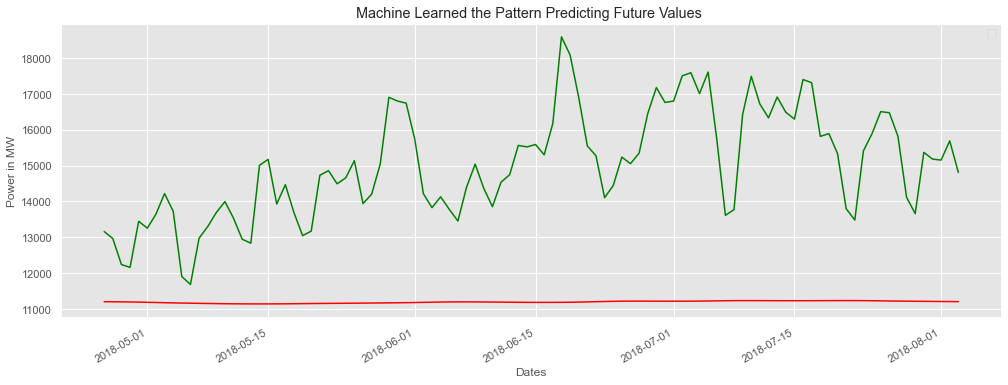

In [40]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()